In [1]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/Sundipta/Desktop/180124/180124_ty2_processed.csv")

In [4]:
data.tail()

,Unnamed: 0,Time,B1,B2,B3,B4,B5,B6,B7,B8,Time_secs
132,132,1:40:00,1160010,43950,125914,163112,191585,52570,87526,88361,7800.0
133,133,1:41:00,1156380,43989,125430,163540,192823,52625,87702,88116,7860.0
134,134,1:42:00,1156920,44081,126188,163713,191194,52778,87726,88229,7920.0
135,135,1:43:00,1154833,44210,126000,164026,190739,52678,87714,88466,7980.0
136,136,1:44:00,1160921,43942,126686,164126,191339,52580,87613,88466,8040.0


In [5]:
data["Time_min"] = data["Time_secs"]/(60)

In [6]:
tail = data[-10:]
tail.head(10)

,Unnamed: 0,Time,B1,B2,B3,B4,B5,B6,B7,B8,Time_secs,Time_min
127,127,1:35:00,1152769,43885,125147,162835,190172,52368,87727,88362,7500.0,125.0
128,128,1:36:00,1157795,43885,126104,163652,189950,52320,87496,88533,7560.0,126.0
129,129,1:37:00,1152706,43972,125906,163190,191383,52479,87190,88389,7620.0,127.0
130,130,1:38:00,1158151,43970,127011,163101,190399,52326,87935,88343,7680.0,128.0
131,131,1:39:00,1160287,43884,126029,163797,191265,52537,87443,88008,7740.0,129.0
132,132,1:40:00,1160010,43950,125914,163112,191585,52570,87526,88361,7800.0,130.0
133,133,1:41:00,1156380,43989,125430,163540,192823,52625,87702,88116,7860.0,131.0
134,134,1:42:00,1156920,44081,126188,163713,191194,52778,87726,88229,7920.0,132.0
135,135,1:43:00,1154833,44210,126000,164026,190739,52678,87714,88466,7980.0,133.0
136,136,1:44:00,1160921,43942,126686,164126,191339,52580,87613,88466,8040.0,134.0


In [7]:
ty2_1 = tail['B2'].mean()
ty2_2 = tail['B3'].mean()
ty2_3 = tail['B4'].mean()
ty2_4 = tail['B5'].mean()

In [8]:
x = [0.0,0.5,0.75,1.0]
y = [ty2_1, ty2_2, ty2_3, ty2_4]

In [9]:
x1 = np.asarray(x)

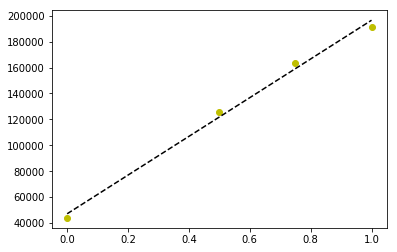

In [10]:
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')


In [11]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [12]:
print r_value**2

0.99379814836


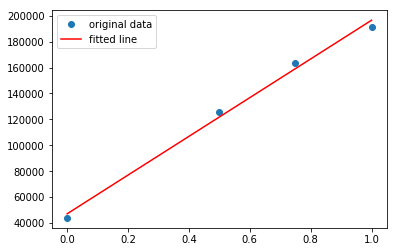

In [13]:

plt.plot(x, y, 'o', label='original data')
plt.plot(x,intercept + slope*x1 , 'r', label='fitted line')
plt.legend()
plt.show()

In [14]:
intercept

47177.365714285726

In [15]:
slope

149290.19428571427

In [16]:
gate_only = tail['B6'].mean()
gate_rep1 = tail['B7'].mean()
gate_rep2 = tail['B8'].mean()

In [17]:
avg_trig = (gate_rep1+gate_rep2)/2

In [18]:
(avg_trig - intercept)/slope

0.27322547526229257

In [19]:
diff = avg_trig - gate_only
(diff + ty2_1 - intercept)/slope

0.21595915552237593

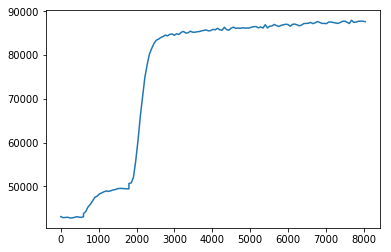

In [20]:
plt.plot(data['Time_secs'],data['B7'])